In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

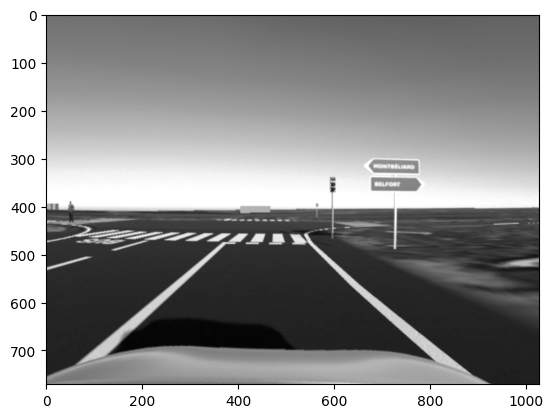

In [2]:
img = cv2.imread('image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

Calibration matrices

In [3]:
K = np.array([  [1124.66943359375, 0.0, 505.781982421875],
                [0.0, 1124.6165771484375, 387.8110046386719],
                [0.0, 0.0, 1.0]])

T_cam_to_ground = np.array([[ 0.99991969 , 0.01149682 ,-0.00533206 , 0.05419943],
 [ 0.00510958 , 0.01929436 , 0.99980079 , 1.96159697],
 [ 0.0115974  ,-0.99974774  ,0.01923406  ,1.55057154],
    [ 0.          ,0.          ,0.          ,1.        ]])


print(K)
print(T_cam_to_ground)

[[1.12466943e+03 0.00000000e+00 5.05781982e+02]
 [0.00000000e+00 1.12461658e+03 3.87811005e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.99991969  0.01149682 -0.00533206  0.05419943]
 [ 0.00510958  0.01929436  0.99980079  1.96159697]
 [ 0.0115974  -0.99974774  0.01923406  1.55057154]
 [ 0.          0.          0.          1.        ]]


In [4]:
pts_pxl = np.array([[0, 0, 1],
                    [0, img.shape[0], 1],
                    [img.shape[1], 0, 1],
                    [img.shape[1], img.shape[0], 1]]).T
print(pts_pxl)

[[   0    0 1028 1028]
 [   0  771    0  771]
 [   1    1    1    1]]


In [5]:
pts_cam = np.linalg.inv(K) @ pts_pxl
print(pts_cam)

[[-0.44971613 -0.44971613  0.46433023  0.46433023]
 [-0.34483842  0.34072857 -0.34483842  0.34072857]
 [ 1.          1.          1.          1.        ]]


In [6]:
pts_cam_hom = np.vstack((pts_cam, np.ones((1, pts_cam.shape[1]))))

pts_ground = np.linalg.inv(T_cam_to_ground) @ pts_cam_hom
print(pts_ground)

[[-0.52204522 -0.51854226  0.39192774  0.3954307 ]
 [ 0.50013805  0.51336563  0.51064667  0.52387425]
 [-2.31387875 -1.62844833 -2.3187525  -1.63332208]
 [ 1.          1.          1.          1.        ]]


Là ça n'est pas suffisant, parce que ces points, ce sont seulement les coins du cadre de l'image à 1m de la caméra, exprimés dans le repère de base_link

Il faut mieux faire l'inverse: prendre 4 points au sol et les projeter dans le repère de la caméra